![example](images/director_shot.jpeg)

## Microsoft Film Analysis

**Author:** Andre Layton
***

**NOTES FOR IMPROVEMENT:**

-Measure ROI by Budget!


## Overview

  Microsoft is creating a new movie studio division in an effort to compete with other big companies, like Apple and Amazon, that have been successfully putting out diverse media content. This project aims to analyze movie data from various sources and recommend the best type of film to create for the studio's initial content. The main focus behind the analysis is seeing which films are best to begin creating by calculating and comparing both the Domestic and Worldwide returns on investment (ROI), both measured in percentages. During the course of the analysis, the comparison shifted from ROIs to average ROIs from the datasets due to outliers. The results showed that while a majority of the movies from Box Office Mojo's movie budget dataset fell under Action, Comedy, or Drama genres, which are the three most frequent genres in order, War and Mystery movies yielded the highest average ROI, both domestically and worldwide. However, those genres were lacking enough records to draw conclusions from, shown through the high error bars in both visuals for each genre; as such, if we focus on the genres with low error margins (like the top three mentioned earlier), our results recommend Comedy as the best genre to begin with for both domestic and global success and profit. To be more precise, I'm suggesting a Comedy-Adventure film would be the best to start with, which will require a higher budget than a Comedy film, but will lead to a higher ROI, as shown through this study. 

## Business Problem

Microsoft has created a movie studio; however, the executives are stuck on what type of content to begin creating and investing in. In order to compete with companies who have been dominating the space thus far, I am looking at the film genres that provide the highest return on investment (ROI), both domestically and globally, in order to recommend the best type of film for Microsoft to begin creating. The significance in selecting a genre with a high ROI lies in the impact it could have on future films - if the genre we recommend produces a high ROI for Microsoft, it encourages investors and invites conversations for further film production. It also assures the executives that Microsoft can compete in this space/industry.

## Data Understanding

In order to calculate both ROI levels, data from The Numbers website as well as data from IMDB is necessary. The dataset from The Numbers displays the budgets, domestic gross, worldwide gross, and release dates of various movies, ordered by budget in descending order. The data from The Numbers will be crucial in calculating the ROI, which is equivalent to the gross income divided by the cost of the investment, or the budget in this case. The data located in IMDB is located in a SQLite database with various tables, one of which is "movie_basics", which contains the names, genres, and other details for each movie in the database. Despite the need to calculate the ROI, the independent variable we are interested in is the movie genre and which genres yield the higher ROI rate.

In [30]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3

%matplotlib inline

In [31]:
# Read movie_budgets.csv file
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv.gz')

In [32]:
# Use .info() method to list preliminary information
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [33]:
# List the first 20 records
movie_budgets_df.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [34]:
# Create a connection for the IMDB database
conn = sqlite3.connect('im.db')

# Use .info() method after making a query to select all fields in the movie_basics table
pd.read_sql("""
SELECT *
FROM movie_basics
""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [35]:
# Query and list the first 20 items
pd.read_sql("""
SELECT *
FROM movie_basics
""", conn).head(20)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


## Data Preparation

In order to combine both dataframes and create one single dataset for analysis, I start preparing the movie_budgets data first. I drop any fields I do not need (i.e., 'id') before I clean up the names of the remaining features. 

In [36]:
# Let's clean up the movie_budgets dataframe first to fit what we need for analysis:

# Start by dropping any columns we don't need, like the id column
movie_budgets_df2 = movie_budgets_df.drop('id', axis=1)

# Clean up the column names as well
new_column_names = {'release_date': 'Release Date', 'movie':'Movie Name', 'production_budget': 'Production Budget', 'domestic_gross': 'Domestic Gross',
                    'worldwide_gross': 'Worldwide Gross'}
budgets_df3 = movie_budgets_df2.rename(columns=new_column_names)

Based on the information given by the .info() method, the next step is to change the data type of the last three columns. We'll need them as they are numeric and key to statistical analysis later in our exploratory process. In order to convert these fields to integer types, the values for these fields must be transformed to fit conversion criterion. The .head() method also reveals that there are movie titles that contain apostrophes (') that did not fully convert, and will need further data munging. 

In [37]:
# Change the data type of the last three columns from 'object' to 'int' for future statistical analysis
numeric_columns = ['Production Budget', 'Domestic Gross', 'Worldwide Gross']
for column in numeric_columns:
    budgets_df3[column] = budgets_df3[column].map(lambda x: int(x.replace('$', '').replace(',', '')))

# Clean up the movie names, since that will be the field we use to link the movie_basics table shortly
budgets_df3['Movie Name'] = budgets_df3['Movie Name'].map(lambda x: x.replace('â', '\''))
print(budgets_df3.info())
budgets_df3.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Release Date       5782 non-null   object
 1   Movie Name         5782 non-null   object
 2   Production Budget  5782 non-null   int64 
 3   Domestic Gross     5782 non-null   int64 
 4   Worldwide Gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB
None


,Release Date,Movie Name,Production Budget,Domestic Gross,Worldwide Gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000,309420425,963420425
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923


Next step is to clean up the SQL table to fit for merging with our refined movie budgets dataset. Fortunately, this table doesn't require much work - only renaming the field names. Once that's complete, we merge the two together using the Movie Name field. After joining both tables, we begin cleaning up our final DataFrame by creating a new column representing whether the movie titles match to ensure the genres listed accurately describe the associated movie in each record. We'll remove those records to refine the dataset.

In [38]:
# Next, we'll clean up the SQL table to fit our needs:

# First, rename and keep the columns we need (i.e., primary_title, original_title, genres)
movie_basics_df = pd.read_sql("""
SELECT primary_title AS 'Movie Name', original_title AS 'Original Title', genres AS Genres
FROM movie_basics
""", conn)

# Next, join the two DataFrames together
final_df = pd.merge(budgets_df3, movie_basics_df, on='Movie Name')

# Create a new column to identify which records are incorrectly matched
final_df.loc[final_df['Movie Name'] == final_df['Original Title'], 'Titles Match'] = True
final_df.loc[final_df['Movie Name'] != final_df['Original Title'], 'Titles Match'] = False
incorrect_pairs = final_df[final_df['Titles Match'] == False]

# Find any missing values in the Original Title & Genres fields
incorrect_pairs['Original Title'].isna().loc[incorrect_pairs['Original Title'].isna() == True]
incorrect_pairs['Genres'].isna().loc[incorrect_pairs['Genres'].isna() == True]

# Decision: Remove records
final_df = final_df.dropna()

In order to locate any other records with mismatched movie titles, we create a function to change all movie names with numbers in the string to numeric form to bring a little more consistency in the movie names, and allow us to retain a few more records. We drop all duplicates and clean up the Genres column as well. Our final step for analysis, and vital for the next phase of this study, is to create both ROI columns - Domestic and Worldwide - using the pandas .divide() method. 

In [39]:
# Change written numbers in the Original Title and Movie Name fields to numeric form
def word_to_number(title):
    words = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten"]

    for word in words:
        if word in title:
            start = title.index(word)
            end = start + len(word)
            extracted_word = title[start:end]
            title = title.replace(word, str(words.index(extracted_word)))
    return title

final_df['Original Title'] = final_df['Original Title'].map(lambda x: word_to_number(x))
final_df['Movie Name'] = final_df['Movie Name'].map(lambda x: word_to_number(x))

# Rerun the earlier code to find identical titles in Title Match column
final_df.loc[final_df['Movie Name'] == final_df['Original Title'], 'Titles Match'] = True
incorrect_pairs = final_df[final_df['Titles Match'] == False]

# Drop all records in the incorrect_pairs object from the combined dataset
final_df = final_df.loc[final_df['Titles Match'] == True]

# Drop duplicates
final_df = final_df.drop_duplicates("Movie Name")

# Clean up the Genres field by splitting each genre after the comma
final_df['Genres'] = final_df['Genres'].map(lambda x: x.split(','))

# Calculate and create a column labeled Domestic ROI (%)
final_df['Domestic ROI (%)'] = (final_df['Domestic Gross'].divide(final_df['Production Budget'])) * 100
    
# Next, calculate and create a column labeled Worldwide ROI (%)
final_df['Worldwide ROI (%)'] = (final_df['Worldwide Gross'].divide(final_df['Production Budget'])) * 100

final_df.head(15)

,Release Date,Movie Name,Production Budget,Domestic Gross,Worldwide Gross,Original Title,Genres,Titles Match,Domestic ROI (%),Worldwide ROI (%)
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,"[Action, Adventure, Fantasy]",True,58.710150,254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix,"[Action, Adventure, Sci-Fi]",True,12.217814,42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,"[Action, Adventure, Sci-Fi]",True,138.840250,424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,"[Action, Adventure, Sci-Fi]",True,226.271827,682.711400
5,"Nov 17, 2017",Justice League,300000000,229024295,655945209,Justice League,"[Action, Adventure, Fantasy]",True,76.341432,218.648403
6,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Spectre,"[Action, Adventure, Thriller]",True,66.691392,293.206974
7,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,"[Action, Thriller]",True,162.959672,394.341491
8,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,Solo: A Star Wars Story,"[Action, Adventure, Fantasy]",True,77.733641,142.964126
9,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,The Lone Ranger,"[Action, Adventure, Western]",True,32.473496,94.546224
10,"Mar 9, 2012",John Carter,275000000,73058679,282778100,John Carter,"[Action, Adventure, Sci-Fi]",True,26.566792,102.828400


## Data Modeling

The next phase of this analysis is to visualize the data. The first few visuals will plot both ROIs based on each genre within our dataset. Unfortunately, some records contain multiple genres listed and some only have one. I'll need to revise the plan of action a little further by only retaining the first genre listed. We'll take a look at the final dataset's makeup and statistical breakdown.

In [40]:
# Now let's get a count of all the genres in this dataframe:

# Clean up the Genres field by keeping the first one listed
final_df['Genres'] = final_df['Genres'].transform(lambda x: x[0])
print(final_df['Genres'].value_counts())
final_df.head(15)

Action         530
Drama          456
Comedy         403
Adventure      201
Biography      154
Horror         134
Documentary    131
Crime          120
Thriller        30
Animation       19
Sci-Fi          12
Family           8
Fantasy          7
Mystery          6
Music            5
Romance          5
War              4
Musical          4
Western          2
Sport            2
Name: Genres, dtype: int64


,Release Date,Movie Name,Production Budget,Domestic Gross,Worldwide Gross,Original Title,Genres,Titles Match,Domestic ROI (%),Worldwide ROI (%)
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,Action,True,58.710150,254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix,Action,True,12.217814,42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,Action,True,138.840250,424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,Action,True,226.271827,682.711400
5,"Nov 17, 2017",Justice League,300000000,229024295,655945209,Justice League,Action,True,76.341432,218.648403
6,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Spectre,Action,True,66.691392,293.206974
7,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,Action,True,162.959672,394.341491
8,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,Solo: A Star Wars Story,Action,True,77.733641,142.964126
9,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,The Lone Ranger,Action,True,32.473496,94.546224
10,"Mar 9, 2012",John Carter,275000000,73058679,282778100,John Carter,Action,True,26.566792,102.828400


In [41]:
# Use the .describe() method to preview statistical information about the dataset
final_df.describe()

,Production Budget,Domestic Gross,Worldwide Gross,Domestic ROI (%),Worldwide ROI (%)
count,2.233000e+03,2.233000e+03,2.233000e+03,2233.000000,2233.000000
mean,3.657914e+07,4.525528e+07,1.094562e+08,200.900931,369.059459
std,4.964300e+07,7.502524e+07,2.066078e+08,767.189547,1363.429458
min,1.400000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.000000e+06,7.803260e+05,2.684207e+06,14.892333,38.494136
50%,1.800000e+07,1.862000e+07,3.134118e+07,77.698700,167.051387
75%,4.500000e+07,5.534073e+07,1.120369e+08,182.971240,362.284560
max,4.106000e+08,7.000596e+08,2.208208e+09,22764.410000,41656.474000


According to the breakdown above, the top 3 genres - Action, Comedy, Drama - have far more records than the others; although, Adventure has a respectable amount of records, as well. The other genres have far few records and inspire low confidence in their results and any conclusions we can draw from them. We should see that displayed in the following visuals. The statistical breakdown above shows the presence of outliers in the numerical data, but also gives us a better idea of how to view and focus our analysis. For Domestic ROI, we will plot only those under 1000%, to refine and keep out outliers. 

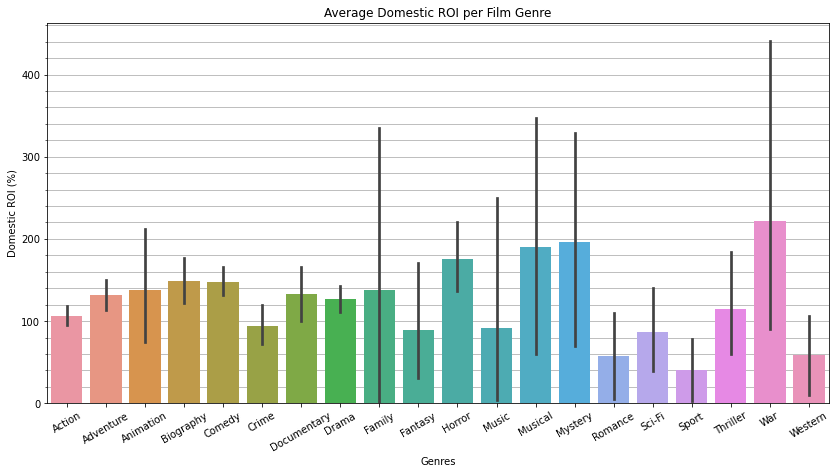

In [75]:
# We'll begin comparing and plotting each genre's median Domestic ROI

# First, let's filter out the outliers and grab the median of the Domestic ROI for each genre
final_df2 = final_df[final_df['Domestic ROI (%)'] <= 1000]

# Now, visualize Genres vs. median Domestic ROI
fig, ax = plt.subplots(figsize=(14, 7))
ax.tick_params(axis='x', labelrotation=30)

# Plotting major and minor gridlines to figure
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minor_locator)
ax.set_axisbelow(True)
plt.grid(which='both')

# Set title and plot graph
ax.set_title('Average Domestic ROI per Film Genre')
sns.barplot(data=final_df2.sort_values('Genres'), y='Domestic ROI (%)', x='Genres');

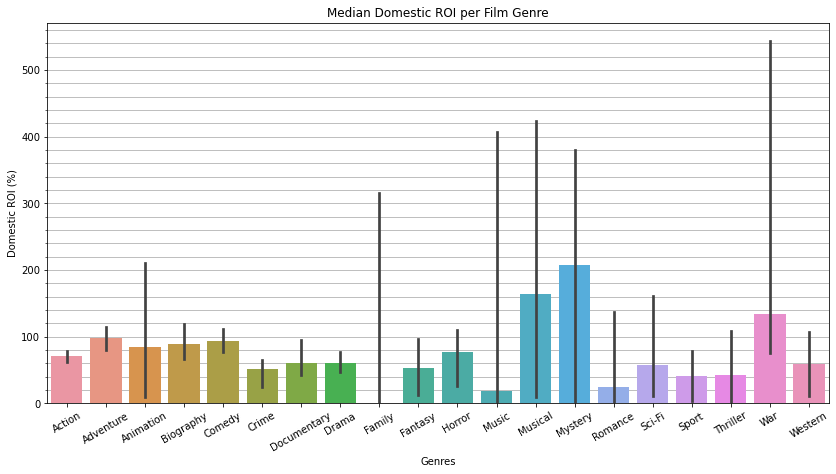

In [79]:
from numpy import median

# Now, visualize Genres vs. median Domestic ROI
fig, ax = plt.subplots(figsize=(14, 7))
ax.tick_params(axis='x', labelrotation=30)

# Plotting major and minor gridlines to figure
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minor_locator)
ax.set_axisbelow(True)
plt.grid(which='both')

# Set title and plot graph
ax.set_title('Median Domestic ROI per Film Genre')
sns.barplot(data=final_df2.sort_values('Genres'), y='Domestic ROI (%)', x='Genres', estimator=median);

Now these plots tell us quite a bit - despite Mystery and Musical movies yielding the highest median Domestic ROIs, their error bars in relation are also quite high. Those high error bars are probably due to films with very low budgets that yielded major success in relation. We'll focus on the top 4 genres - Action, Comedy, Drama, and Adventure - and plot their median and average ROIs. Through this focus, we see that Comedy and Adventure movies produce the highest & second-highest median Domestic ROIs, respectively. 

For Worldwide ROI (%), we will filter our dataset by only focusing on records whose Worldwide ROI is below 2000%, or double of what we selected for Domestic ROI.

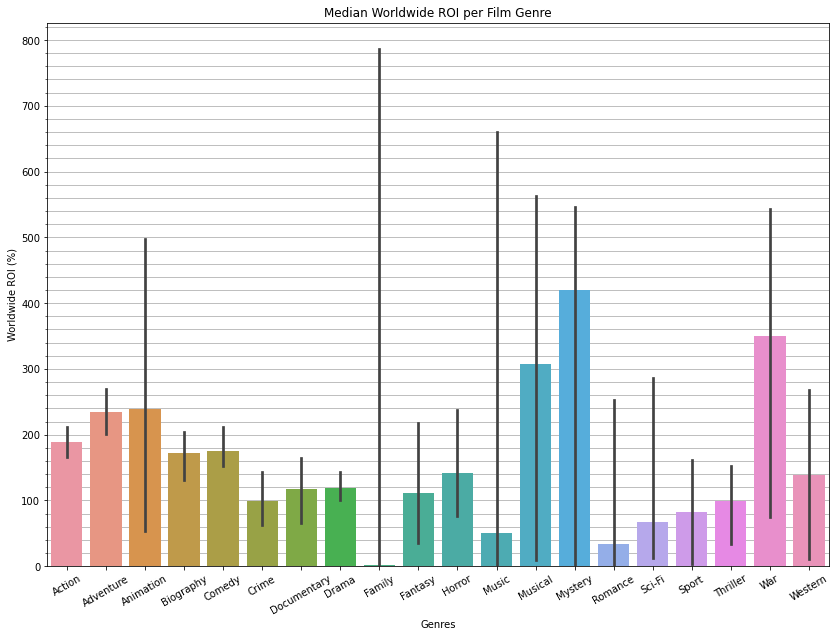

In [80]:
final_df3 = final_df[final_df['Worldwide ROI (%)'] <= 2000]

# Now, visualize Genres vs. average Domestic ROI
fig, ax = plt.subplots(figsize=(14,10))

# Plotting major and minor gridlines to figure
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minor_locator)
ax.set_axisbelow(True)
plt.grid(which='both')

ax.tick_params(axis='x', labelrotation=30)
ax.set_title('Median Worldwide ROI per Film Genre')
sns.barplot(data=final_df3.sort_values('Genres'), y='Worldwide ROI (%)', x='Genres', estimator=median);

This plot tells us a different story! Globally, Horror and Musical movies generate the highest and second-highest median Worldwide ROIs; however, if we focus on the genres with low error margins, like we did earlier, we see that Horror and Adventure movies result in the highest and second-highest median ROIs, instead. 

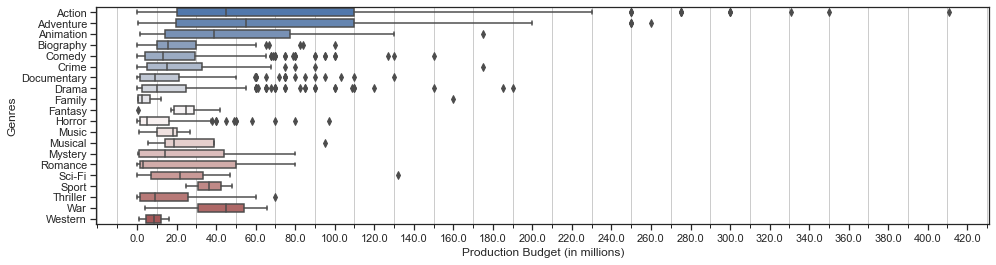

In [63]:
# Next visuals: Genres and their Production Budgets
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(16, 4))

# X axis formatter
# Customizing X-axis scale
def million_formatter(x, pos):
    return str(round(x / 1e6, 1))

ax.xaxis.set_major_formatter(million_formatter)
ax.set_xticks(range(0, 480000000, 20000000))

# Setting minor tick marks 
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')

# Plotting using Seaborn & setting labels
sns.boxplot(x="Production Budget", y="Genres", data=final_df.sort_values('Genres'),
            width=.7, palette="vlag", ax=ax)
ax.set_xlabel('Production Budget (in millions)');

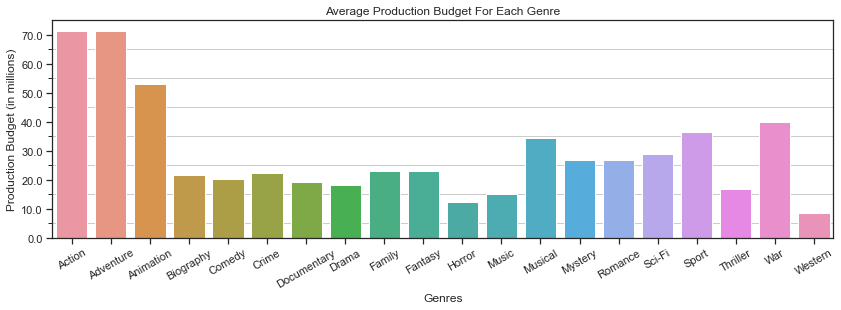

In [64]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.ticklabel_format(style='plain', axis='both')
ax.tick_params(axis='x', labelrotation=30)
ax.yaxis.set_major_formatter(million_formatter)
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
ax.set_title('Average Production Budget For Each Genre')
sns.barplot(data=final_df.sort_values('Genres'), y="Production Budget", x="Genres", ax=ax, ci=False)
ax.set_ylabel('Production Budget (in millions)');

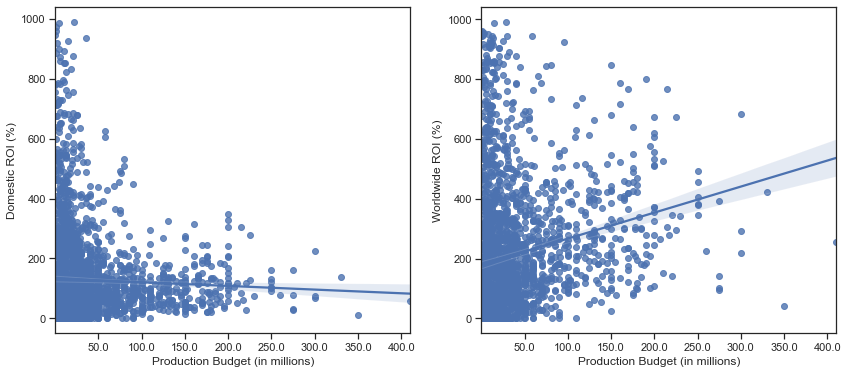

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].xaxis.set_major_formatter(million_formatter)
ax[1].xaxis.set_major_formatter(million_formatter)
sns.regplot(data=final_df2, x='Production Budget', y='Domestic ROI (%)', ax=ax[0])
sns.regplot(data=final_df3, x='Production Budget', y='Worldwide ROI (%)', ax=ax[1])
ax[0].set_xlabel('Production Budget (in millions)')
ax[1].set_xlabel('Production Budget (in millions)');

In [74]:
conn.close()

## Evaluation

Based on the statistical analysis and visual results, Horror movies would be the best genre to begin creating for potential domestic and worldwide success, predicated on the film's return on investment (ROI). Other genres to consider are Comedy movies or Adventure movies, as shown and displayed in the latter two visuals above. Of course, these findings are formulated assuming that we only consider the genres with low margins of error (depicted by the black bars illustrated in the plots above). Musicals and War movies produced high median ROIs; however, that is primarily due to the fact that there were few records for those genres, among others. As such, the results were suscepitble to any outliers that may exist, but also show the high margin of error bars in the plots to portray that fact. If we focus on the genres that contained many records (i.e., the top three listed above), Drama movies were the most prevalent among our dataset - and the visuals show Drama movies produced high median ROIs, as well. 

I am confident these results would generalize beyond the data used for analysis, assuming the movies were assigned individual genres. However, if multiple genres characterize the films, the analysis would need to be modified and refined to include these assumptions. Fortunately, ROI is a great measure of film success and can lead to further film development. 

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

Here are my recommendations based on my analysis: 
1. **Focus on the genres with low margins of error.** While Musical and War movies have the highest returns on investment (ROIs), they are both in the bottom five in value counts, as well. As such, their margins of error are high - meaning that type of success may not be as consistent, or proven, as the plot shows. The genres with low error margins provide a better picture and potentially have more confidence in their results - primarily the top 7 with over 200 records. 

2. **Stick with the top 3 genres.** Horror movies would not be a bad place to start; however, with the top 3 genres - and the majority of our data - being Drama, Action, and Comedy movies, I would focus my energy and resources on those genres that are popular in number and high in ROI, domestically and globally. 

3. **Start with a Comedy or Drama, depending on your goals.** Comedy movies are shown to not only be popular in number, but also also produce high ROIs, and would be a great place to start. However, if the goal is to also get nominated for accolades and compete for awards, Dramas are generally the best route to go. Dramas, fortunately, fall in the top 3 in both ROIs, assuming we focus on the low error margins. In either route, I would also recommend casting high-profile actors/actresses to further promote the film and promote a high return on investment. 

The analysis above, as mentioned earlier, is formulated assuming each movie has one individual genre that defines it. Unfortunately, films can be characterized in multiple ways/genres, and the analysis would need to be revise with that factored in, in order to solve the business problem when presented with those possible datasets. To further improve this project, I could  also analyze ratings, see how that compares with ROI success, and observe any changes in results (or any confirmations). If I were Microsoft, I would also look into creating a streaming service and any research behind what other companies did or created to possibly factor that into the decision (i.e., Apple created AppleTV+ and produced a Drama movie for its first film, Amazon created Prime and produced a Drama as well, etc.).